# Model 아키텍쳐 수립

In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
import tensorflow as tf
from tensorflow.keras import layers, utils
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras.layers.normalization import BatchNormalization
import numpy as np

# Initialising the CNN
model = tf.keras.Sequential()

# dropout 비율은 0.3으로 지정
dropout_rate = 0.3

model.add(layers.Conv2D(16, (3, 3), padding='same', use_bias=False, input_shape=(64, 64, 3)))
model.add(layers.BatchNormalization(axis=3, scale=True))
model.add(layers.Activation("relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(layers.Dropout(dropout_rate)) 

model.add(layers.Conv2D(32, (3, 3), padding='same', use_bias=False))
model.add(layers.BatchNormalization(axis=3, scale=True))
model.add(layers.Activation("relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(layers.Dropout(dropout_rate))

model.add(layers.Conv2D(64, (3, 3), padding='same', use_bias=False))
model.add(layers.BatchNormalization(axis=3, scale=True))
model.add(layers.Activation("relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(layers.Dropout(dropout_rate))

model.add(layers.Conv2D(128, (3, 3), padding='same', use_bias=False))
model.add(layers.BatchNormalization(axis=3, scale=True))
model.add(layers.Activation("relu"))
model.add(layers.Flatten())
model.add(layers.Dropout(dropout_rate))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

# Compiling the CNN
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])




Using TensorFlow backend.
C:\Users\hongs\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hongs\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hongs\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hongs\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        432       
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 16)        64        
_________________________________________________________________
activation (Activation)      (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4608      
____

'\n# 모델 예측하기\nprint("-- Predict --")\n\noutput = model.predict_generator(\n            test_set,\n            steps = 1)\nprint(test_set.class_indices)\nnp.set_printoptions(formatter={\'float\': lambda x: "{0:0.3f}".format(x)})\n\nprint(output)\nprint(test_set.filenames)\n'

# Train/Test/Validation Set 할당 및 모델 학습, 저장

In [ ]:
# Part 2 - Fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(rescale = 1./255)

# 데이터셋 불러오기
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.7,
                                   zoom_range=[0.9, 2.2],
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest',
                                   validation_split=0.2)


test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r'food_img\train',
                                                 shuffle=True,
                                                 seed=13,
                                                 target_size = (64, 64),
                                                 batch_size = 200,
                                                 class_mode = 'categorical',
                                                 subset="training")

validation_set = train_datagen.flow_from_directory(r'food_img\train',
                                                 shuffle=True,
                                                 seed=13,
                                                 target_size = (64, 64),
                                                 batch_size = 200,
                                                 class_mode = 'categorical',
                                                 subset="validation")

test_set = test_datagen.flow_from_directory(r'food_img//test',
                                            target_size = (64, 64),
                                            batch_size = 50,
                                            class_mode = 'categorical')

hist = model.fit_generator(training_set,
                         steps_per_epoch = 60,
                         epochs = 100,
                         validation_data = validation_set,
                         validation_steps = 15,
                         callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)])


from keras.models import load_model

model.save('cnn_food_classifier_model_ver2.h5')

# 모델 Evaluation

In [ ]:
# 모델 평가하기
print("-- Evaluate --")

scores = model.evaluate_generator(
            validation_set,
            steps = 10)

print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))


## Classification 수행

In [ ]:
test_set = ImageDataGenerator(rescale = 1./255)

test_set = test_set.flow_from_directory('food_img_test', target_size = (64,64))

print("--Predict--")

output = model.predict_generator(test_set)
print(test_set.class_indices)
np.set_printoptions(formatter={'float': lambda x : "{0:0.3f}".format(x)})

print(output)
print(test_set.filenames)

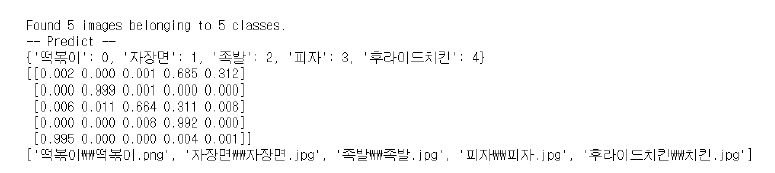

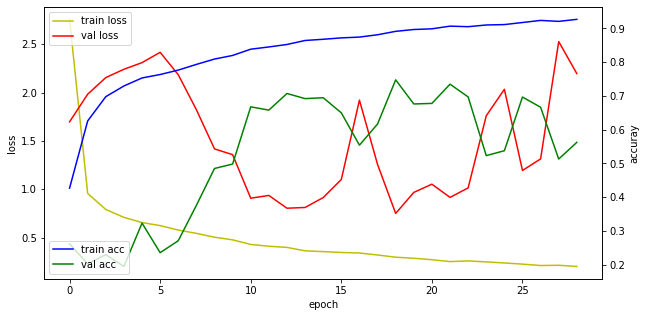

In [3]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(10, 5))
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()